D:\Users\Lenovo\ana\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Detection shape: (13, 13, 255)
Detection content: [[[ 1.22592509e-01  2.87064224e-01  4.39503402e-01 ... -3.98111796e+00
   -4.78155565e+00 -4.65271997e+00]
  [ 4.66421604e-01  6.12855911e-01  2.24394023e-01 ... -3.90549111e+00
   -4.80518484e+00 -4.98829746e+00]
  [ 5.27635157e-01  5.22427797e-01  2.64960408e-01 ... -3.44245791e+00
   -4.71304274e+00 -4.42853498e+00]
  ...
  [-2.88306534e-01  1.01635098e+00  3.97133827e-01 ... -4.61394596e+00
   -5.37480783e+00 -4.75164032e+00]
  [-1.32338494e-01  1.09963858e+00  7.17721283e-02 ... -4.67155981e+00
   -5.31934404e+00 -5.27402878e+00]
  [-4.42290843e-01  4.65535402e-01  2.71779835e-01 ... -3.72849202e+00
   -4.85480165e+00 -4.48485947e+00]]

 [[ 6.24586701e-01 -6.09660372e-02  4.35600430e-03 ... -4.45904112e+00
   -4.85343075e+00 -4.78569698e+00]
  [ 8.61636996e-02 -2.67041862e-01 -5.32713309e-02 ... -4.80673075e+00
   -5.39295721e+00 -6.09196854e+00]
  [ 2.32587419e-02 -5.66352844e-01  1.07095659e-01

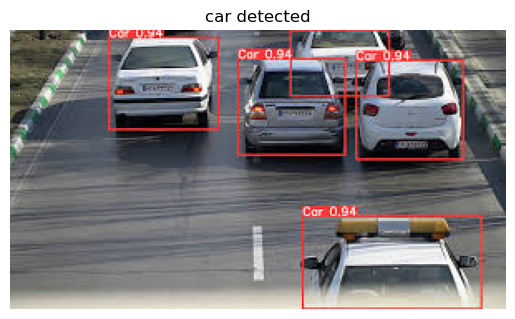

In [17]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt

def detect_cars_yolov3(image_path, model_path):
    try:
        # Load YOLOv3 model
        yolo_model = load_model(model_path)

        # Load image
        img = cv2.imread(image_path)
        if img is None:
            print("Error: Unable to load image.")
            return

        height, width, _ = img.shape

        # Resize image to match YOLO input size
        resized_img = cv2.resize(img, (416, 416))
        resized_img = resized_img / 255.0  # Normalize pixel values

        # Perform forward pass
        outputs = yolo_model.predict(np.expand_dims(resized_img, axis=0))

        class_ids = []
        confidences = []
        boxes = []

        # Process outputs
        for output in outputs:
            for detection in output:
                print("Detection shape:", detection.shape)
                print("Detection content:", detection)
                scores = detection[5:]
                print("Scores shape:", scores.shape)
                class_id = np.argmax(scores)
                print("Class ID:", class_id)
                confidence = scores[class_id]
                print("Confidence:", confidence)
                if confidence > 0.5 and class_id == 2:  # Class ID 2 represents cars in COCO dataset
                    center_x = int(detection[0] * width)
                    center_y = int(detection[1] * height)
                    w = int(detection[2] * width)
                    h = int(detection[3] * height)

                    # Rectangle coordinates
                    x = int(center_x - w / 2)
                    y = int(center_y - h / 2)

                    boxes.append([x, y, w, h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)

        # Apply non-max suppression
        indexes = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.5, nms_threshold=0.4)

        font = cv2.FONT_HERSHEY_PLAIN
        colors = np.random.uniform(0, 255, size=(len(boxes), 3))

        # Draw bounding boxes and labels
        for i in range(len(boxes)):
            if i in indexes:
                x, y, w, h = boxes[i]
                label = f"Car {i + 1}"
                color = colors[i]
                cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
                cv2.putText(img, label, (x, y - 5), font, 1, color, 1)

        # Show result
        cv2.imshow("Image", img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    except Exception as e:
        print("Error:", e)

# Test the function
detect_cars_yolov3(r"C:\Users\Lenovo\Deep learning\Picture1.png", r"yolov3.h5")
img = tf.io.read_file(r"C:\Users\Lenovo\Deep learning\Picture1.png")
img = tf.io.decode_jpeg(img, channels=3)

img = tf.squeeze(img).numpy()
plt.imshow(img)
plt.title("car detected")
plt.axis('off')
plt.show();